In [2]:
import pandas as pd
df = pd.read_csv('../../../Data/tips.csv')
df

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [4]:
df['tip_pct'] = (df['tip'] / df['total_bill']) * 100
df

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.944673
1,10.34,1.66,No,Sun,Dinner,3,16.054159
2,21.01,3.50,No,Sun,Dinner,3,16.658734
3,23.68,3.31,No,Sun,Dinner,2,13.978041
4,24.59,3.61,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,No,Sat,Dinner,2,9.820426


In [5]:
df.pivot_table(values = 'tip_pct',
               index = 'day',
               columns= 'smoker',
               aggfunc = 'mean')

smoker,No,Yes
day,,
Fri,15.165044,17.478305
Sat,15.804766,14.790607
Sun,16.011294,18.725032
Thur,16.029808,16.386327


## Resampling and Rolling

In [9]:
df = pd.read_csv('../../../Data/Fremont.csv', index_col='Date', parse_dates=True)
df

/var/folders/73/qcrsdy597xv51xvfmxk30stm0000gn/T/ipykernel_97096/3345906426.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../../../Data/Fremont.csv', index_col='Date', parse_dates=True)


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-03-25 09:00:00,23.0,10.0,13.0
2020-03-25 10:00:00,49.0,17.0,32.0
2020-03-25 11:00:00,26.0,12.0,14.0


<Axes: >

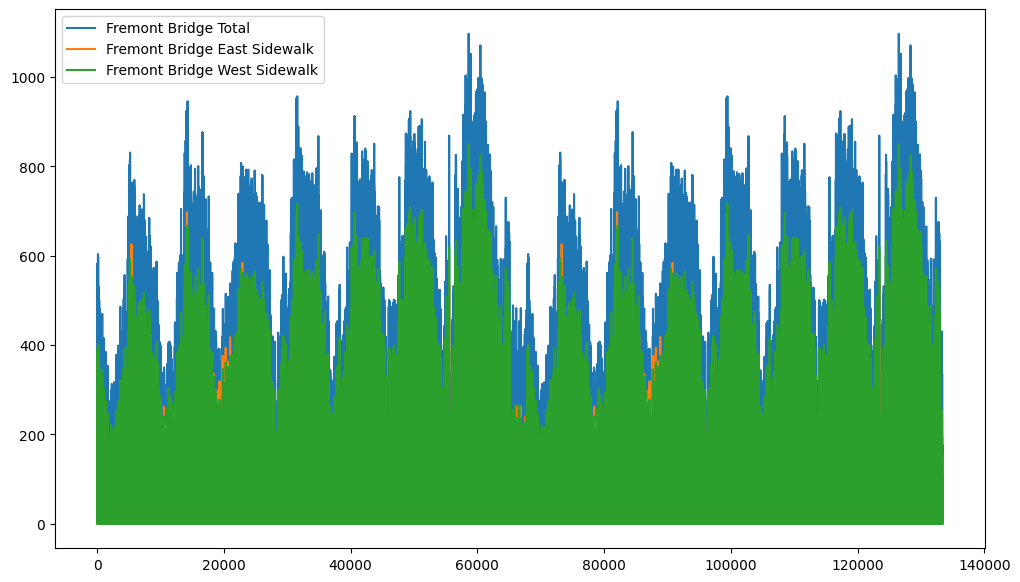

In [7]:
df.plot(figsize=(12, 7))

<Axes: xlabel='Date'>

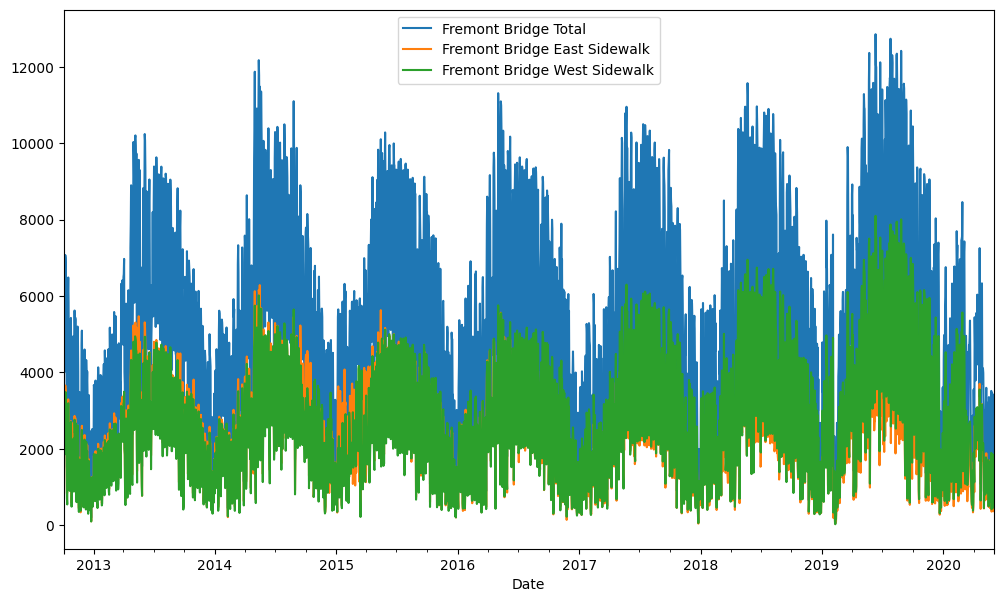

In [14]:
df.resample('D').sum().plot(figsize=(12, 7))

<Axes: xlabel='Date'>

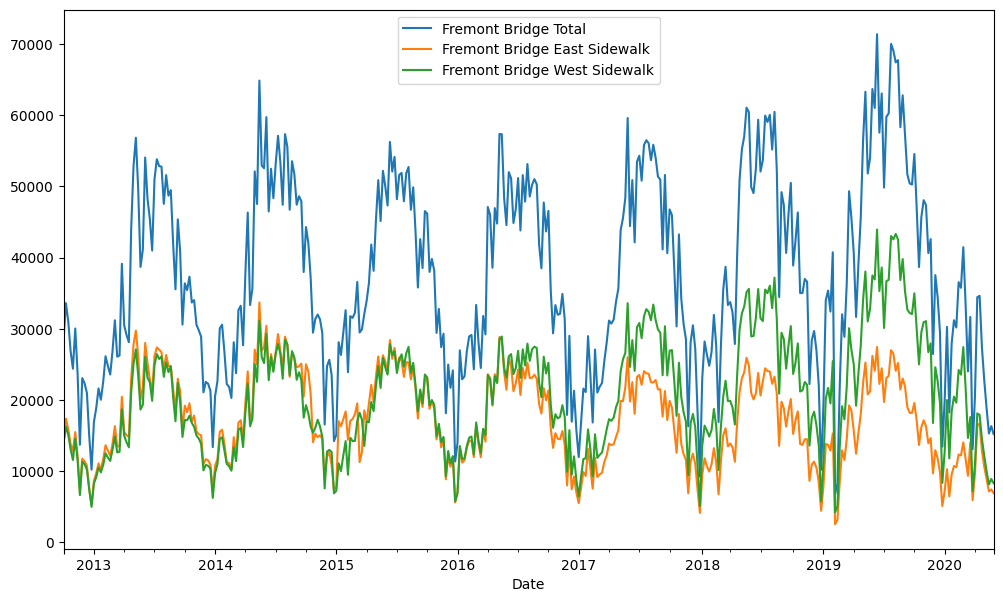

In [16]:
df.resample('W').sum().plot(figsize=(12, 7))

<Axes: xlabel='Date'>

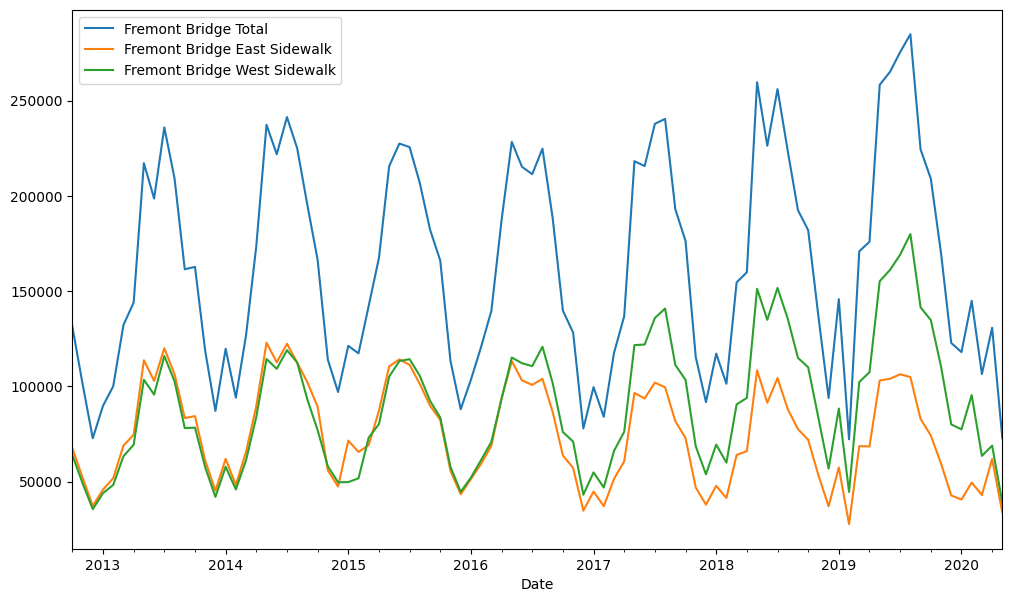

In [18]:
df.resample('ME').sum().plot(figsize=(12, 7))

<Axes: xlabel='Date'>

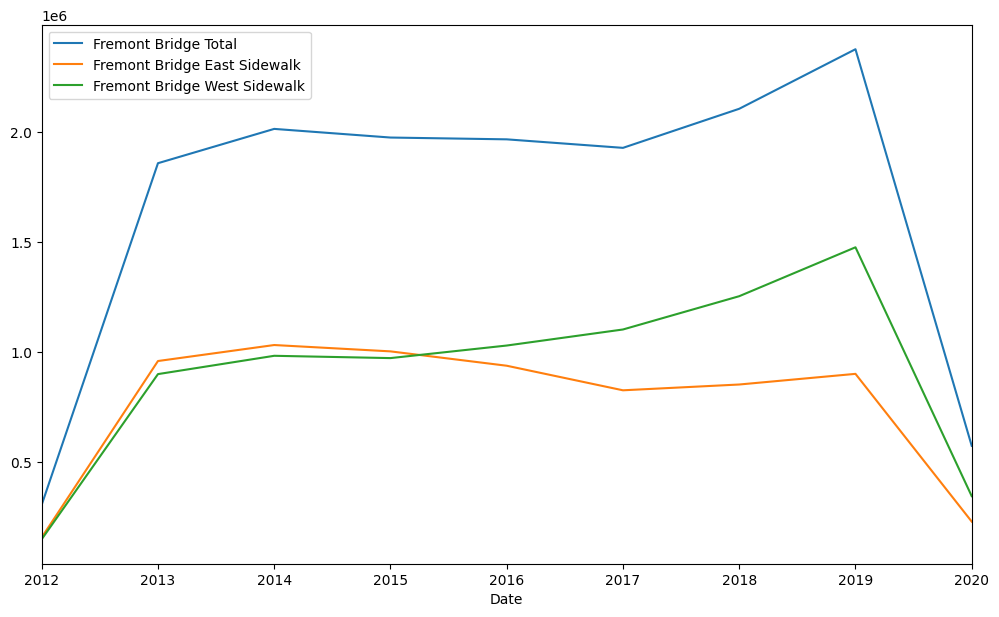

In [20]:
df.resample('YE').sum().plot(figsize=(12, 7))

<Axes: xlabel='Date'>

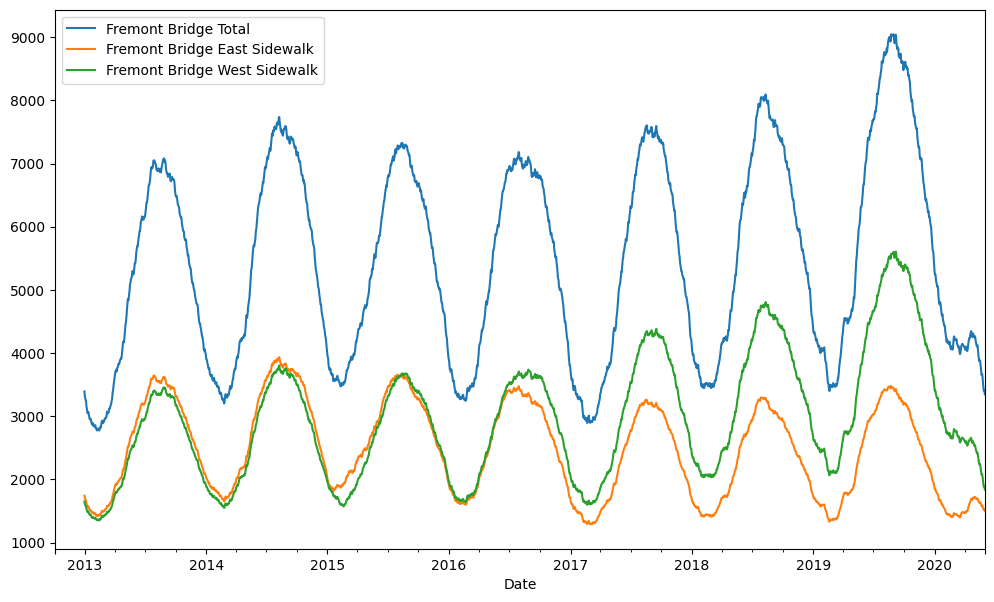

In [30]:
df.resample('D').sum().rolling(90).mean().plot(figsize=(12, 7))